## 考察
### わかったこと
・現在の日本と東京は毎日約20%感染者数が増加しており、これはロックダウンした地域の約2週間後の変化率に相当   
・早いタイミングでロックダウンを実施した中国では、実施約1か月後に変化率が約0%、outbreak終息した様子
### 所感
・現状の東京の増加率は異常値ではなさそう（オーバーシュートした地域は+40~80%だった）  
・ロックダウン有用。すごい（日本でやるべきかは何ともいえないけど） 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

In [2]:
#4/5時点_世界全体のデータ
#出典：https://ourworldindata.org/grapher/covid-confirmed-cases-since-100th-case
df = pd.read_csv('covid-confirmed-cases-since-100th-case.csv', index_col='Date', parse_dates=True)

#4/5時点_東京のデータ
#出典：https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
df_tokyo = pd.read_csv('130001_tokyo_covid19_patients.csv', index_col='公表_年月日', parse_dates=True)

In [3]:
df.head()

,Entity,Code,(cases),Number of days since the 100th confirmed case (days)
Date,,,,
2019-12-31,Afghanistan,AFG,0.0,NaN
2020-01-01,Afghanistan,AFG,0.0,NaN
2020-01-02,Afghanistan,AFG,0.0,NaN
2020-01-03,Afghanistan,AFG,0.0,NaN
2020-01-04,Afghanistan,AFG,0.0,NaN


In [4]:
#変化率計算
df['Total confirmed cases_pct_change'] = df.groupby('Code')[' (cases)'].pct_change()

In [5]:
df.tail()

,Entity,Code,(cases),Number of days since the 100th confirmed case (days),Total confirmed cases_pct_change
Date,,,,,
2020-04-01,Zimbabwe,ZWE,8.0,NaN,0.142857
2020-04-02,Zimbabwe,ZWE,8.0,NaN,0.000000
2020-04-03,Zimbabwe,ZWE,8.0,NaN,0.000000
2020-04-04,Zimbabwe,ZWE,9.0,NaN,0.125000
2020-04-05,Zimbabwe,ZWE,9.0,NaN,0.000000


In [6]:
#各地域のData Frame作成
df_jp = df[df['Code'] == 'JPN']
df_sp = df[df['Code'] == 'ESP']
df_us = df[df['Code'] == 'USA']
df_cn = df[df['Code'] == 'CHN']

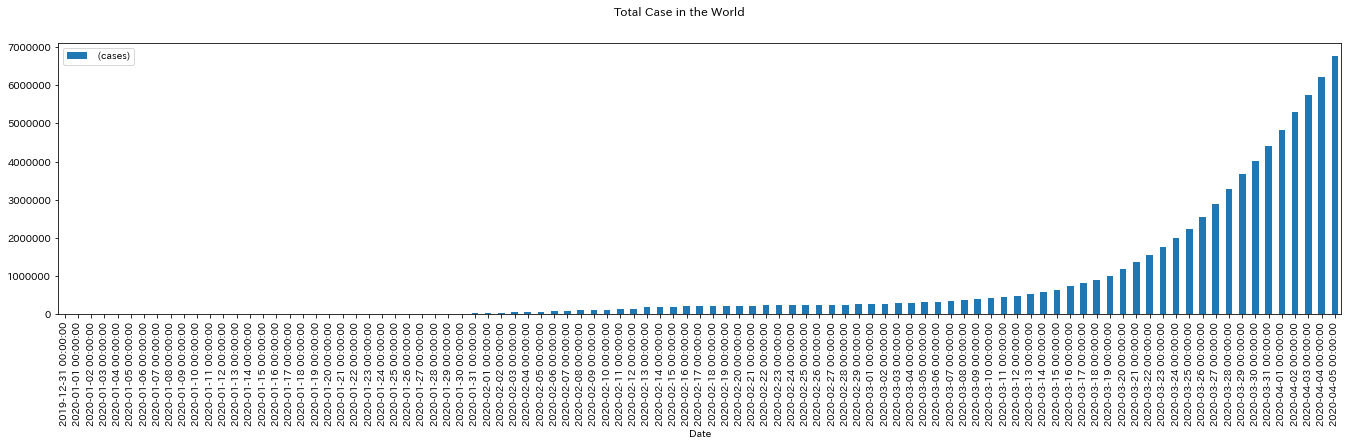

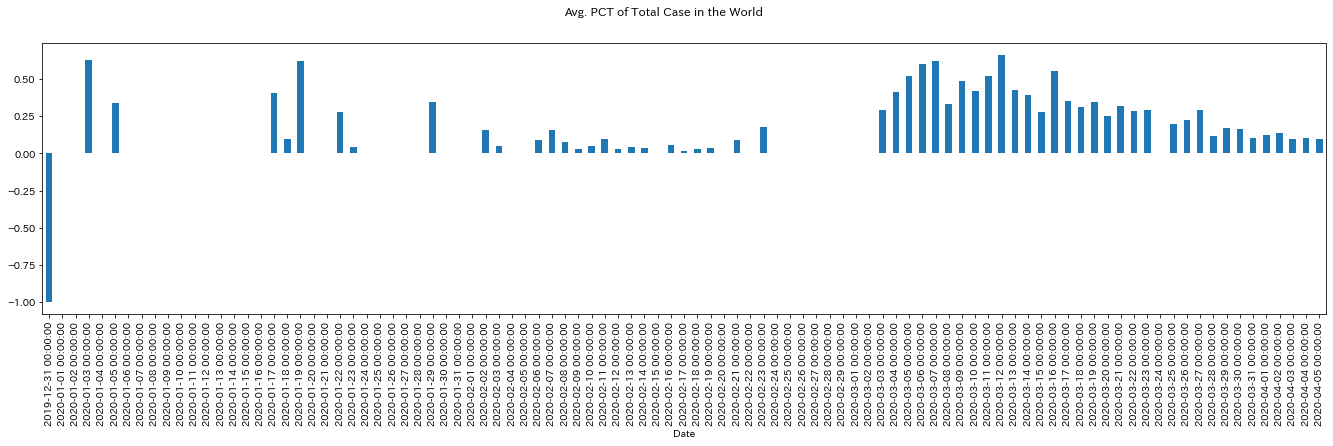

In [7]:
#日付ごとの感染総数集計
d = df.groupby('Date').agg({' (cases)':'sum'})
#日付ごとの感染総数_変化率の平均値計算
d_pct = df.groupby('Date')['Total confirmed cases_pct_change'].mean()

#全世界_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in the World")
d.plot(kind='bar', ax=ax1)

#全世界_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("Avg. PCT of Total Case in the World")
d_pct.plot(kind='bar', ax=ax2)

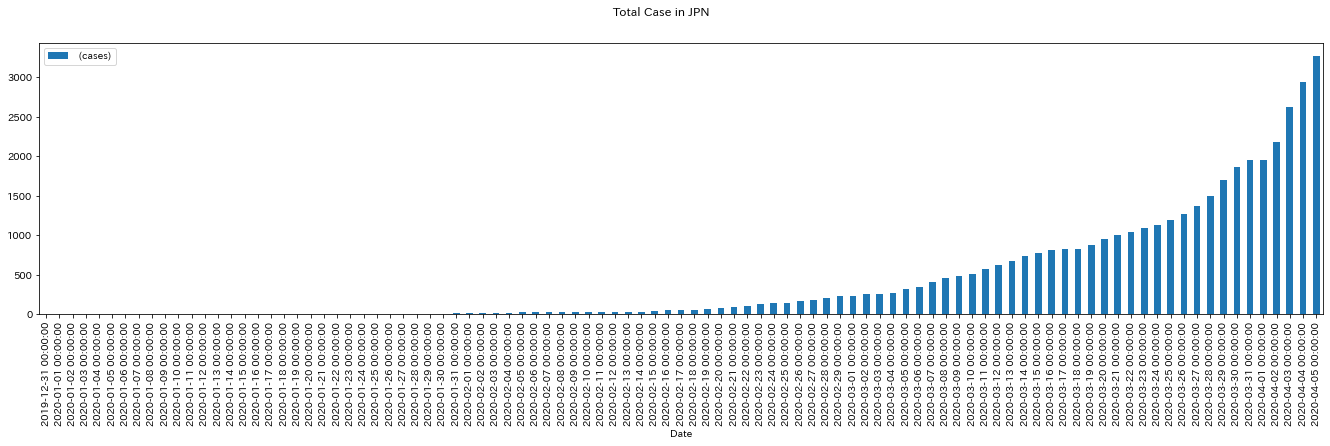

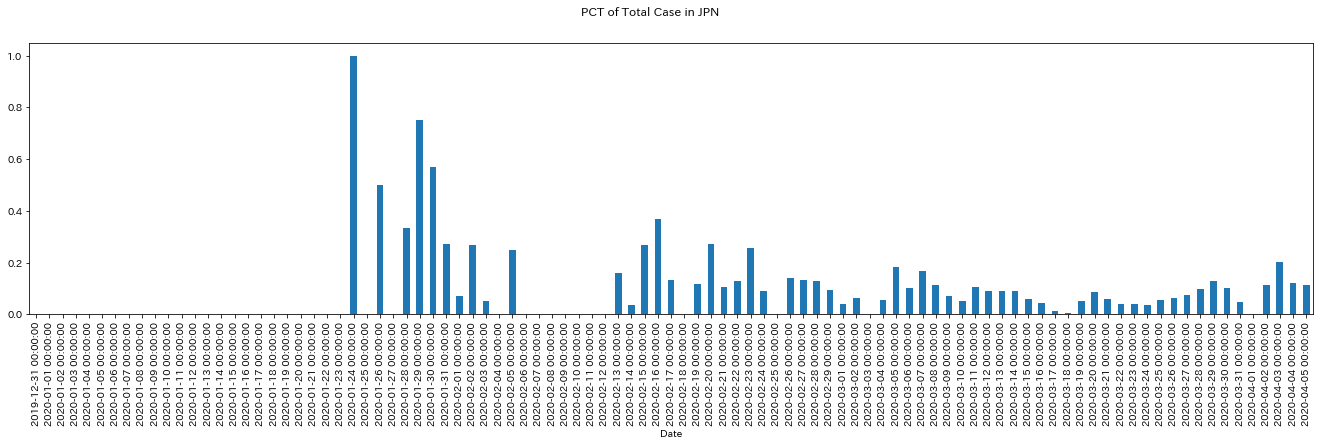

In [8]:
d_jp = df_jp.groupby('Date').agg({' (cases)':'sum'})
d_jp_pct = df_jp.groupby('Date')['Total confirmed cases_pct_change'].mean()

#JPN_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in JPN")
d_jp.plot(kind='bar', ax=ax1)

#JPN_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("PCT of Total Case in JPN")
d_jp_pct.plot(kind='bar', ax=ax2)

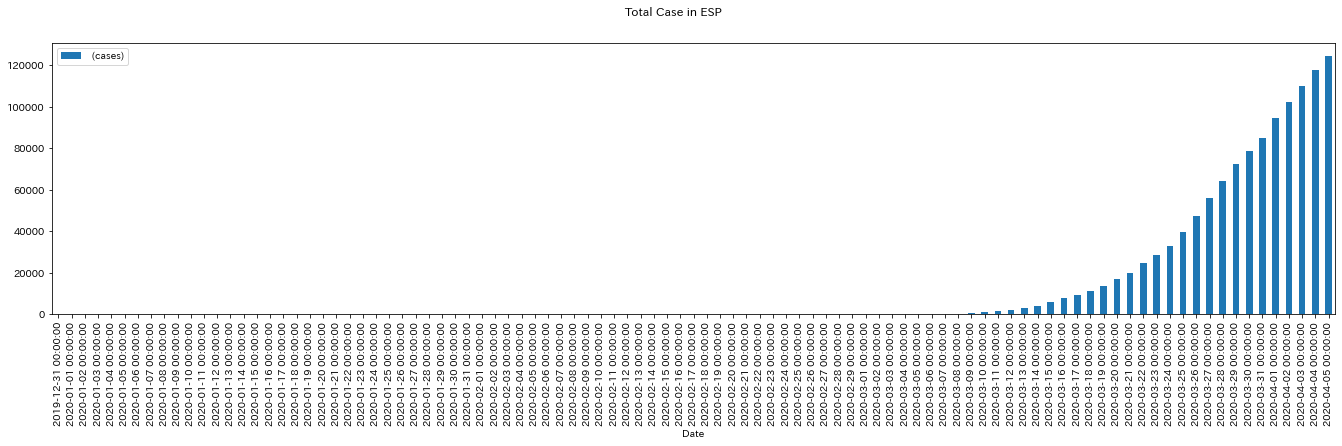

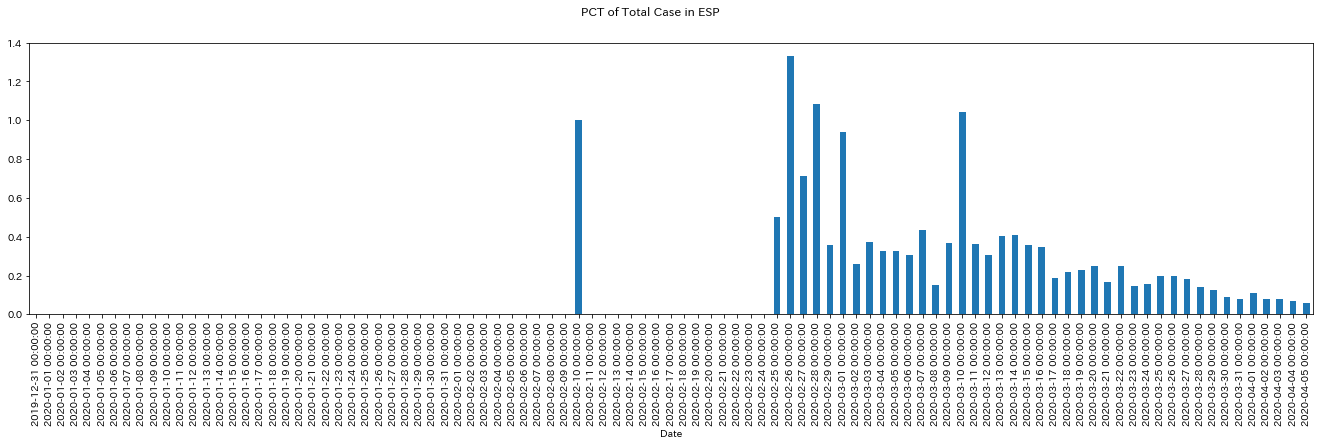

In [9]:
d_sp = df_sp.groupby('Date').agg({' (cases)':'sum'})
d_sp_pct = df_sp.groupby('Date')['Total confirmed cases_pct_change'].mean()

#ESP_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in ESP")
d_sp.plot(kind='bar', ax=ax1)

#ESP_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("PCT of Total Case in ESP")
d_sp_pct.plot(kind='bar', ax=ax2)

#Memo
#3/14 ロックダウン

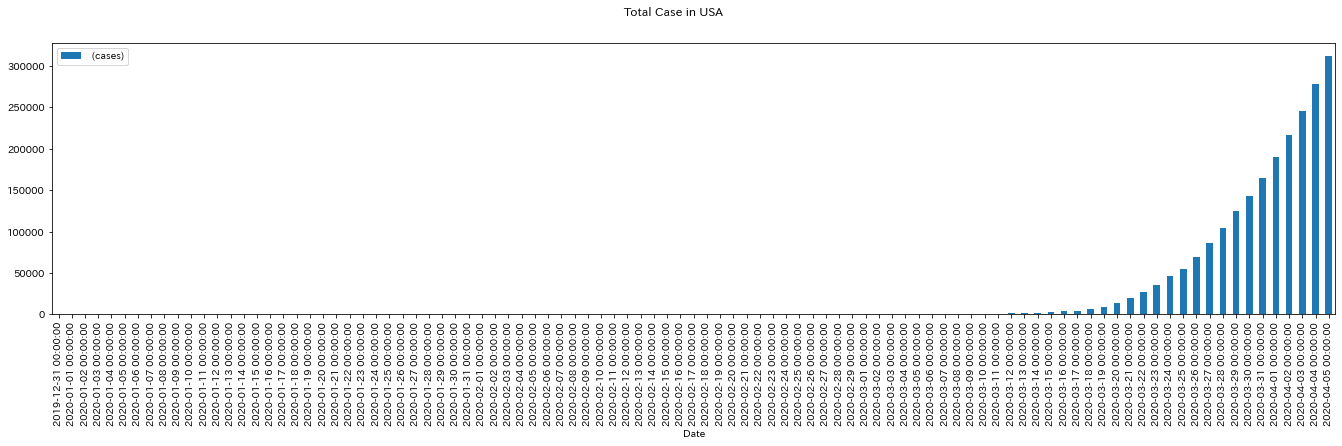

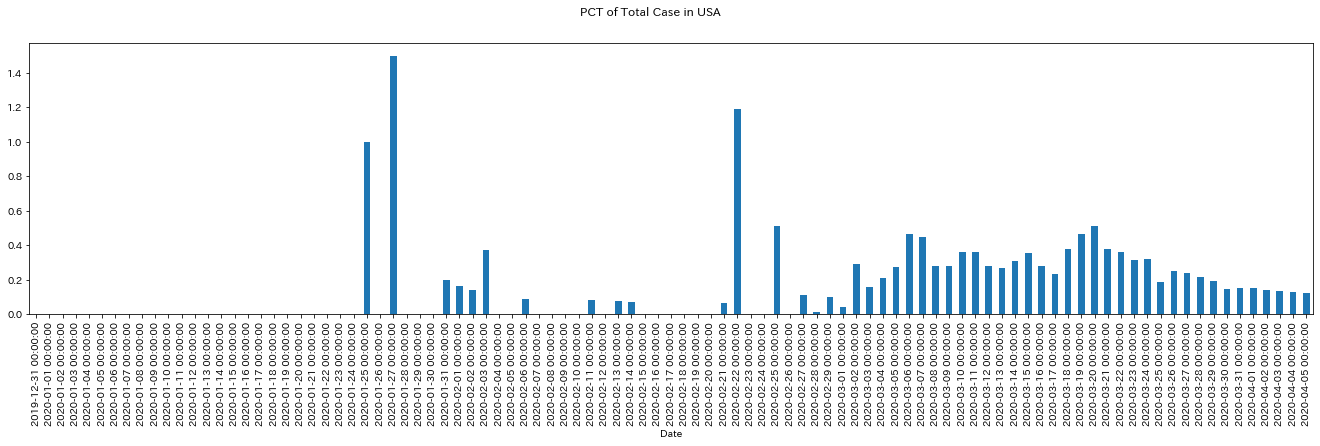

In [10]:
d_us = df_us.groupby('Date').agg({' (cases)':'sum'})
d_us_pct = df_us.groupby('Date')['Total confirmed cases_pct_change'].mean()

#USA_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in USA")
d_us.plot(kind='bar', ax=ax1)

#ESP_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("PCT of Total Case in USA")
d_us_pct.plot(kind='bar', ax=ax2)

#Memo
#3/19 ロックダウン

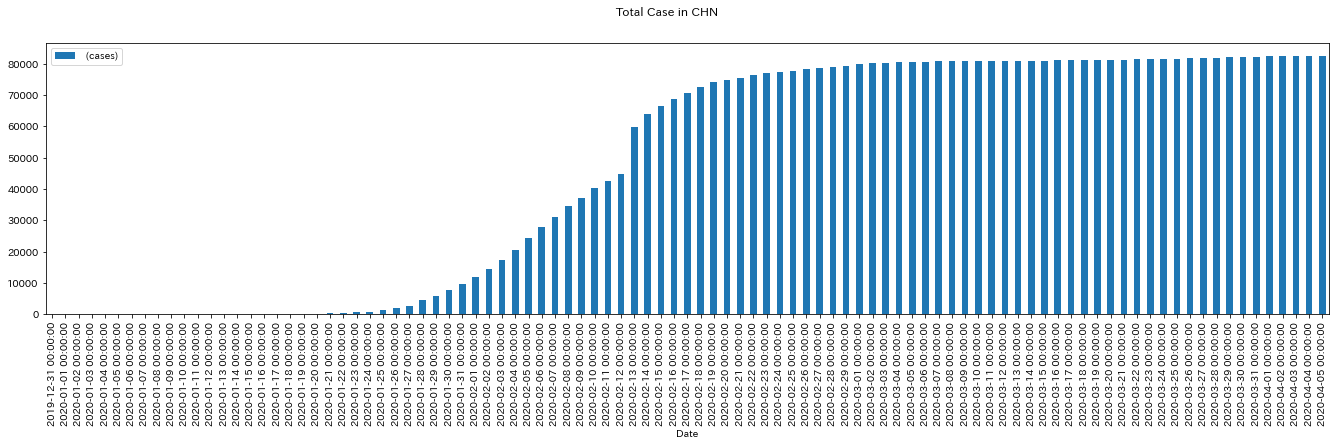

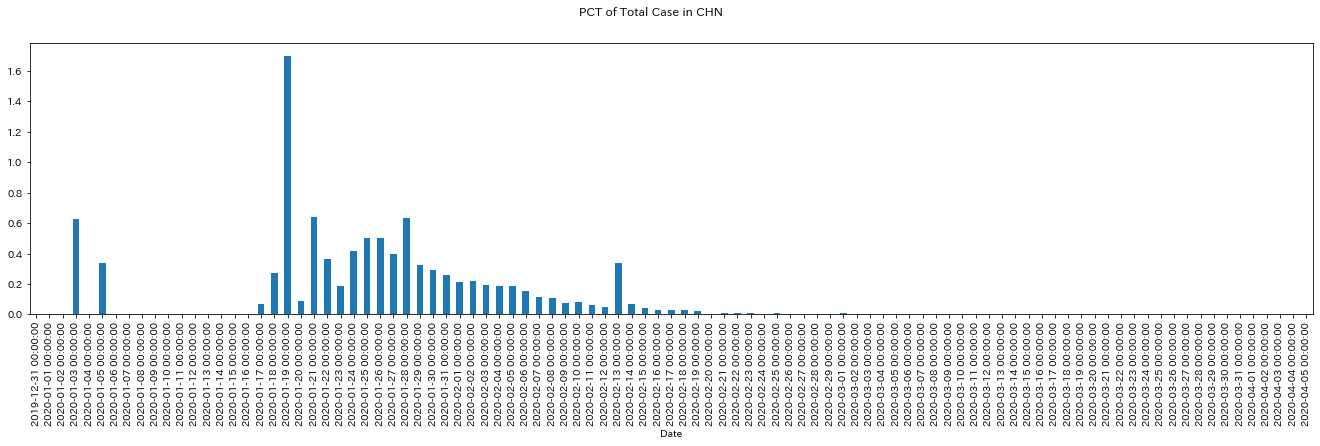

In [11]:
d_cn = df_cn.groupby('Date').agg({' (cases)':'sum'})
d_cn_pct = df_cn.groupby('Date')['Total confirmed cases_pct_change'].mean()

#CHN_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in CHN")
d_cn.plot(kind='bar', ax=ax1)

#CHN_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("PCT of Total Case in CHN")
d_cn_pct.plot(kind='bar', ax=ax2)

#Memo
#1/23 ロックダウン

In [12]:
df_tokyo.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
公表_年月日,,,,,,,,,,,,,,,
2020-01-24,1,130001,東京都,NaN,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-25,2,130001,東京都,NaN,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-30,3,130001,東京都,NaN,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-13,4,130001,東京都,NaN,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14,5,130001,東京都,NaN,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


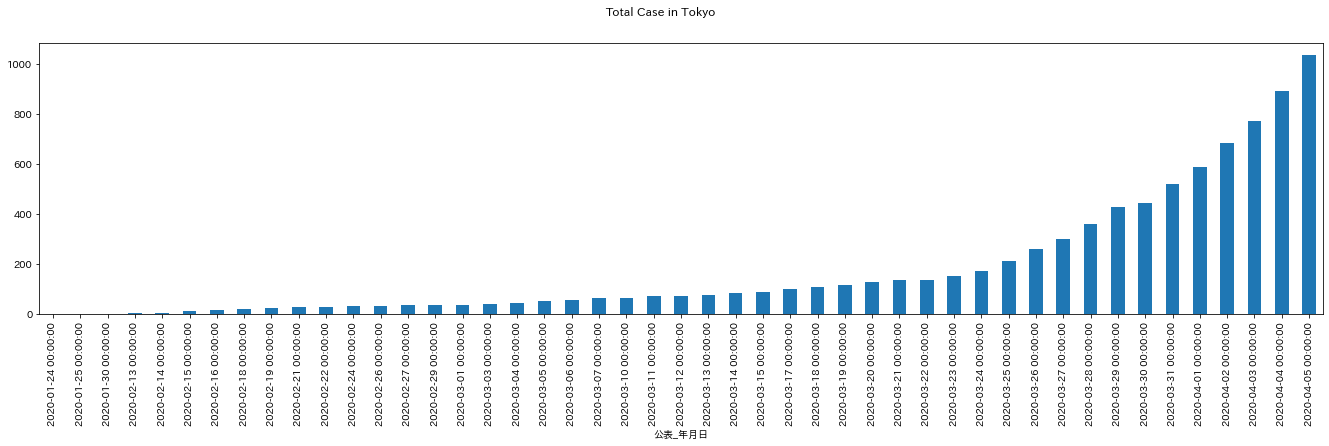

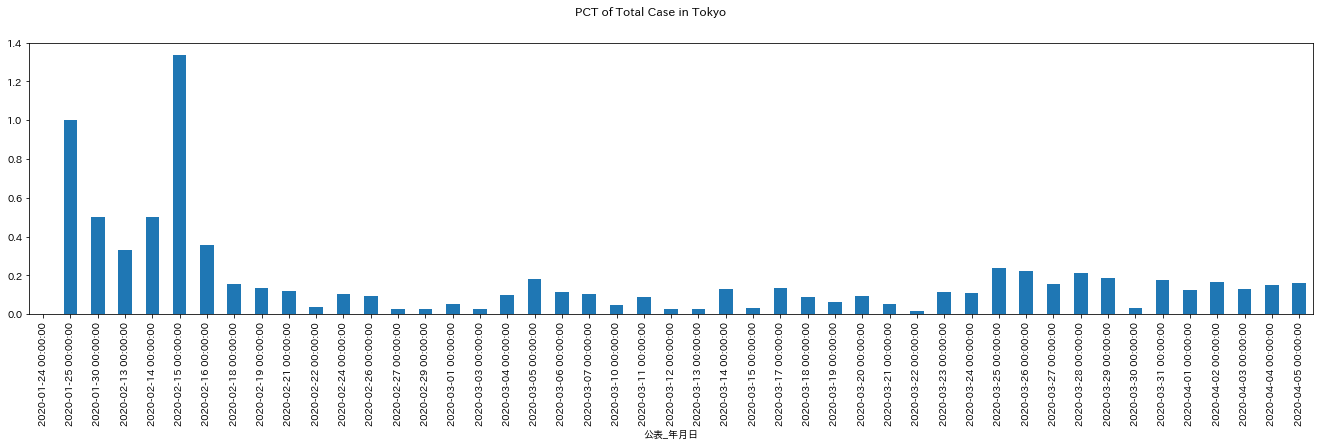

In [13]:
#日付ごとの感染総数集計
d_tokyo = df_tokyo.groupby('公表_年月日')['No'].count().cumsum()
#日付ごとの感染総数_変化率
d_tokyo_pct = df_tokyo.groupby('公表_年月日')['No'].count().cumsum().pct_change()

#Tokyo_Daily感染総数をプロット
fig = plt.figure(figsize=(23, 5))
ax1 = fig.add_subplot(1,1,1)
fig.suptitle("Total Case in Tokyo")
d_tokyo.plot(kind='bar', ax=ax1)

#Tokyo_Daily感染総数の変化率をプロット
fig = plt.figure(figsize=(23, 5))
ax2 = fig.add_subplot(1,1,1)
fig.suptitle("PCT of Total Case in Tokyo")
d_tokyo_pct.plot(kind='bar', ax=ax2)